#기본 참조

In [2]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from google.colab.patches import cv2_imshow
import urllib.request

drive.mount('/content/drive')
image_path = '/content/drive/My Drive/bit.jpg'

Mounted at /content/drive


# 이진 영상의 모폴로지 연산

## 이진 영상의 침식과 팽창

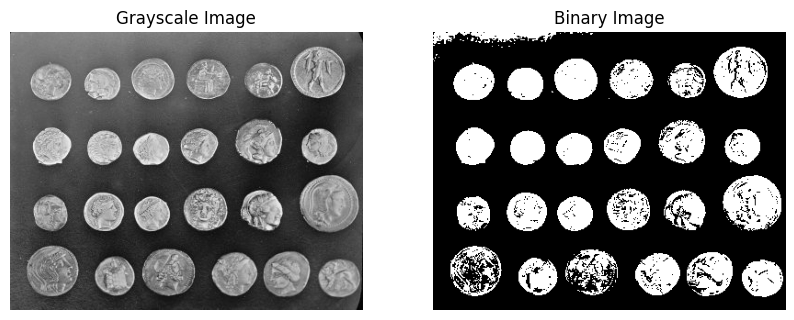

In [3]:
# 예제 이미지 로드 (skimage의 camera 이미지를 사용)
image = data.coins()
# 이미지를 이진화 (threshold를 이용하여 이진화)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

inv_binary_image = cv2.bitwise_not(binary_image)

# 원본 이미지와 이진화된 이미지 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

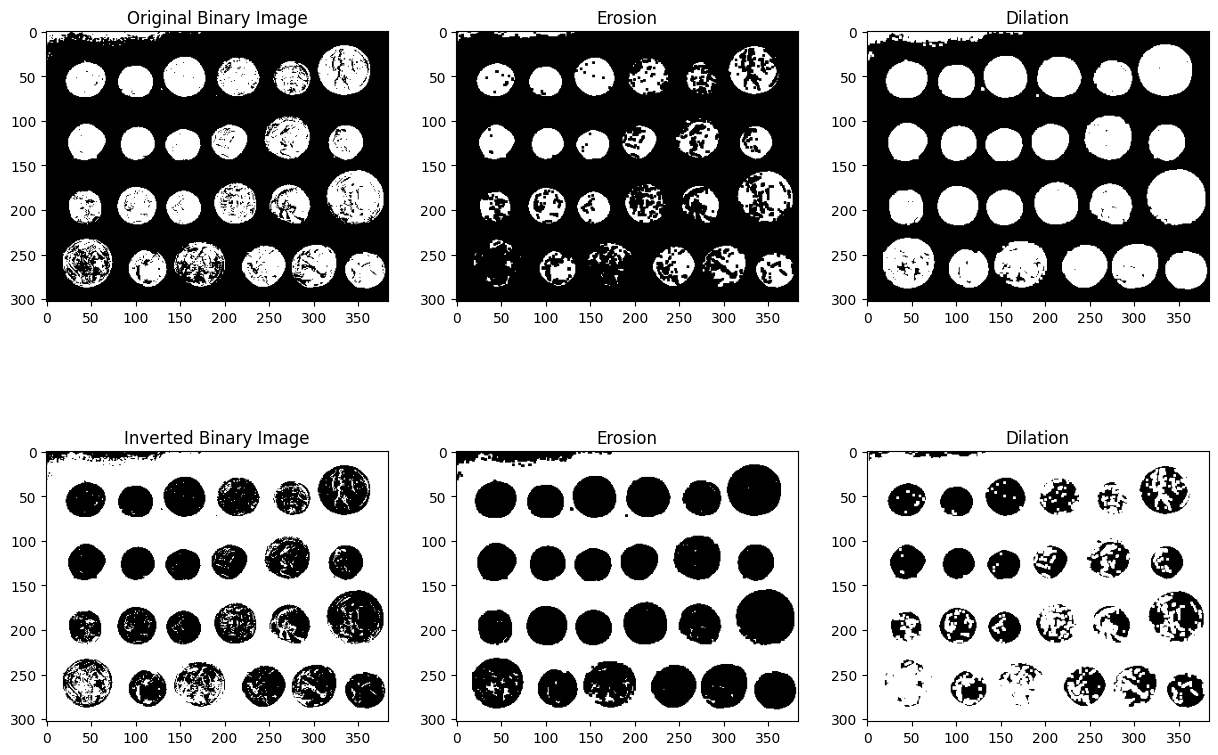

In [4]:
# 커널 생성
kernel = np.ones((3, 3), np.uint8)

# 모폴로지 연산 - 침식
erosion = cv2.erode(binary_image, kernel, iterations=1)

# 모폴로지 연산 - 팽창
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# 모폴로지 연산 - 침식
inv_erosion = cv2.erode(inv_binary_image, kernel, iterations=1)

# 모폴로지 연산 - 팽창
inv_dilation = cv2.dilate(inv_binary_image, kernel, iterations=1)

# 모폴로지 연산 결과 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')

plt.subplot(2, 3, 4)
plt.imshow(inv_binary_image, cmap='gray')
plt.title('Inverted Binary Image')

plt.subplot(2, 3, 5)
plt.imshow(inv_erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(2, 3, 6)
plt.imshow(inv_dilation, cmap='gray')
plt.title('Dilation')

plt.show()


## 이진 영상의 열기와 닫기 연산

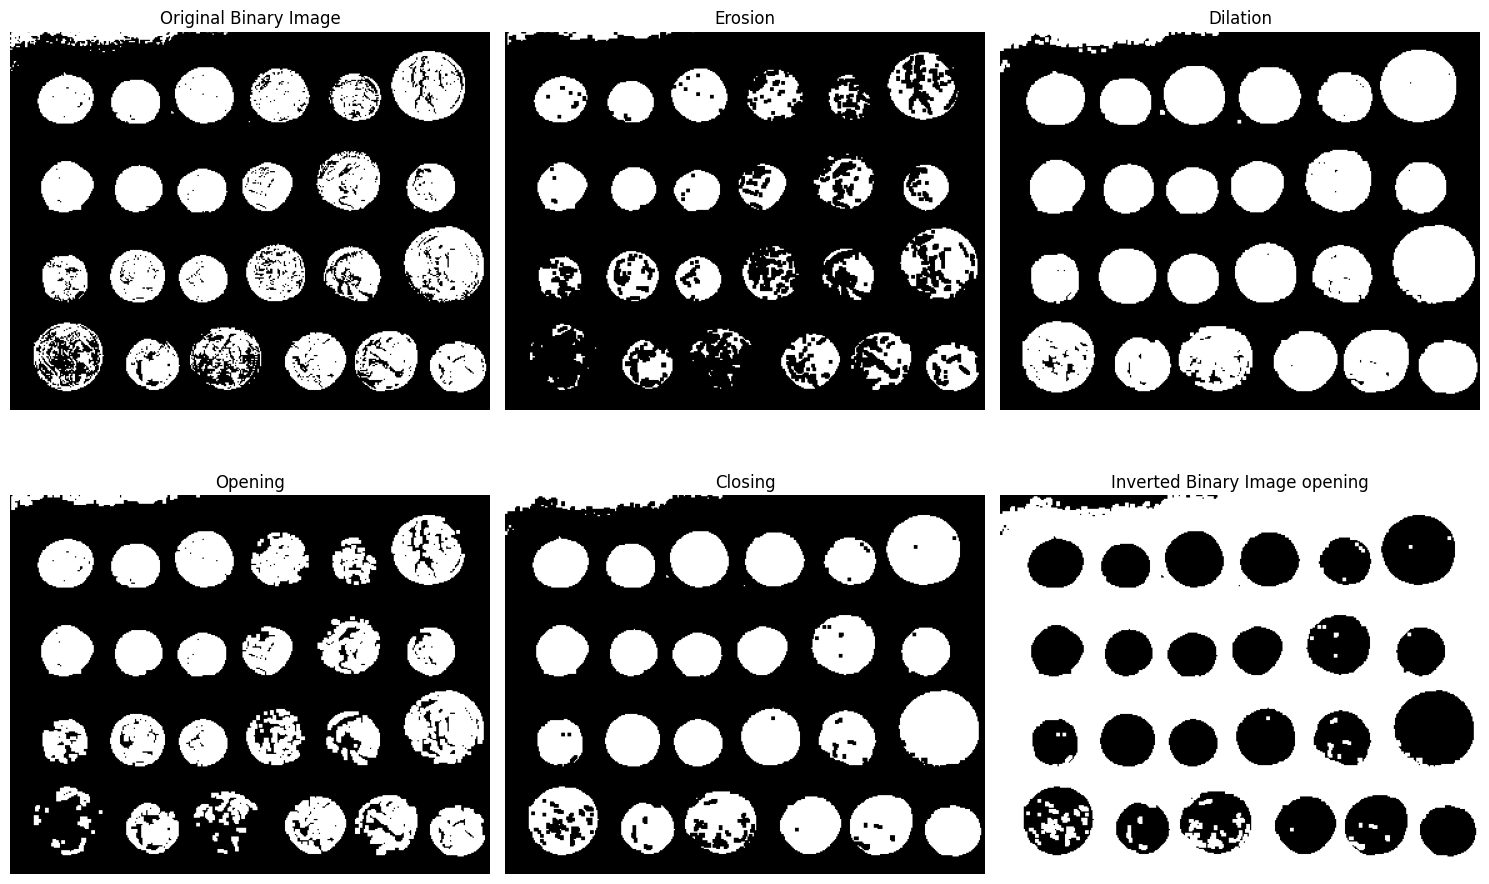

In [5]:
# 커널 생성
kernel = np.ones((3, 3), np.uint8)

# 모폴로지 연산 - 침식
erosion = cv2.erode(binary_image, kernel, iterations=1)

# 모폴로지 연산 - 팽창
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# 모폴로지 연산 - 열기
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# 모폴로지 연산 - 닫기
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# 모폴로지 연산 - 반전 후 열기
inv_opening = cv2.morphologyEx(inv_binary_image, cv2.MORPH_OPEN, kernel)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 서브플롯에 이미지 표시
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title('Original Binary Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(erosion, cmap='gray')
axs[0, 1].set_title('Erosion')
axs[0, 1].axis('off')

axs[0, 2].imshow(dilation, cmap='gray')
axs[0, 2].set_title('Dilation')
axs[0, 2].axis('off')

axs[1, 0].imshow(opening, cmap='gray')
axs[1, 0].set_title('Opening')
axs[1, 0].axis('off')

axs[1, 1].imshow(closing, cmap='gray')
axs[1, 1].set_title('Closing')
axs[1, 1].axis('off')

axs[1, 2].imshow(inv_opening, cmap='gray')
axs[1, 2].set_title('Inverted Binary Image opening')
axs[1, 2].axis('off')

# 여백 조정
plt.tight_layout()
plt.show()

In [6]:
# 빈 이미지 생성 (30x30 크기, 0은 검은색)
image = np.zeros((30, 30), dtype=np.uint8)

# 사각형 그리기
top_left = (6, 6)  # 첫 번째 사각형의 좌상단 좌표
bottom_right = (14, 14)  # 첫 번째 사각형의 우하단 좌표

top_left2 = (10, 10)  # 두 번째 사각형의 좌상단 좌표
bottom_right2 = (22, 22)  # 두 번째 사각형의 우하단 좌표

cv2.rectangle(image, top_left, bottom_right, 255, -1)  # 흰색 사각형
cv2.rectangle(image, top_left2, bottom_right2, 255, -1)  # 흰색 사각형

image[15 : 17, 15 : 17] = 0
image[3 : 5, 20 : 22] = 255

# 커널 생성
kernel = np.ones((3, 3), np.uint8)

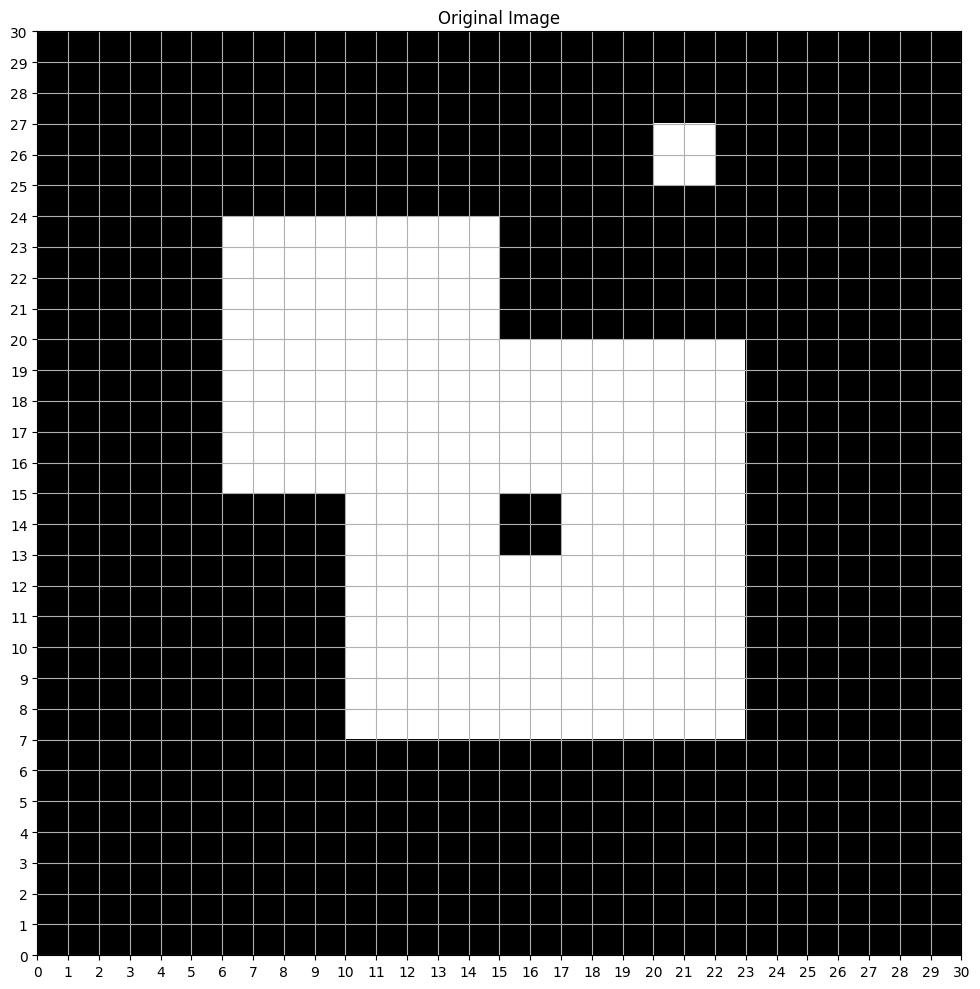

In [7]:
# 침식
erosion = cv2.erode(image, kernel, iterations=1)

# 팽창
dilation = cv2.dilate(image, kernel, iterations=1)

# 열기 (Opening)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 닫기 (Closing)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# 형태학적 기울기 (Morphological Gradient)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# 형태학적 기울기 (Morphological Gradient)
gradient2 = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=2)

# Top-Hat 변환 (원본 이미지와 열기 이미지의 차이)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=2)

# Black-Hat 변환 (닫기 이미지와 원본 이미지의 차이)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=2)

def visualize(ax, img, title):
    ax.imshow(img, cmap='gray', extent=[0, 30, 0, 30], vmin=0, vmax=255)
    ax.set_title(title)
    ax.set_xticks(np.arange(0, 31, 1))  # x 축 눈금 설정
    ax.set_yticks(np.arange(0, 31, 1))  # y 축 눈금 설정
    ax.grid(True)
    ax.set_aspect('equal')


# 결과 시각화
fig, axs = plt.subplots(1, 1, figsize=(15, 10))

visualize(axs, image, 'Original Image')

plt.tight_layout()
plt.show()


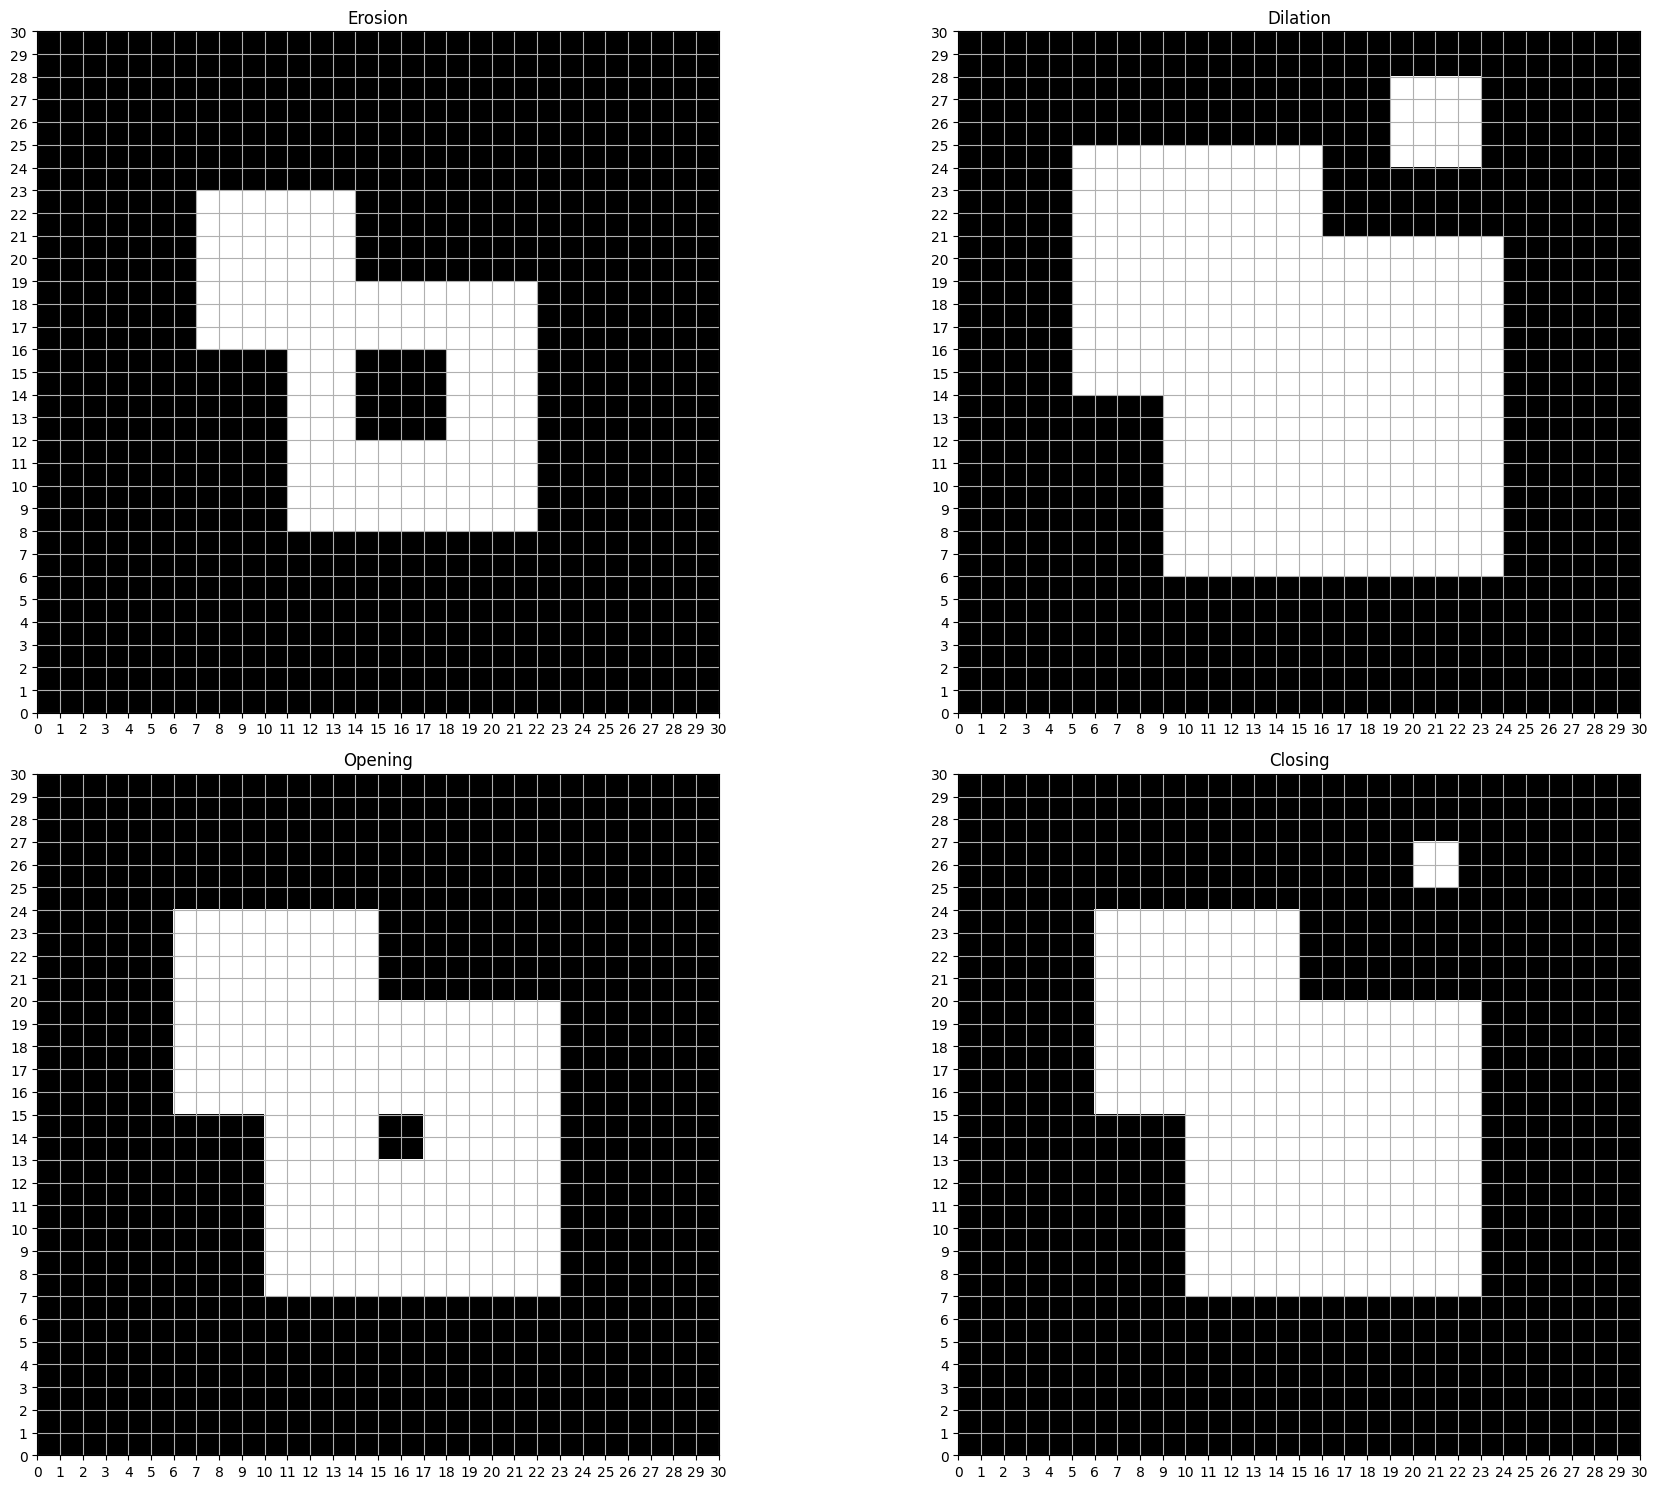

In [8]:
# 결과 시각화
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Erosion
visualize(axs[0, 0], erosion, 'Erosion')

# Dilation
visualize(axs[0, 1], dilation, 'Dilation')

# Opening
visualize(axs[1, 0], opening, 'Opening')

# Closing
visualize(axs[1, 1], closing, 'Closing')

plt.tight_layout()
plt.show()

#### Q. iteration을 2 이상의 값으로 한다면 어떤 연산을 수행하는가?

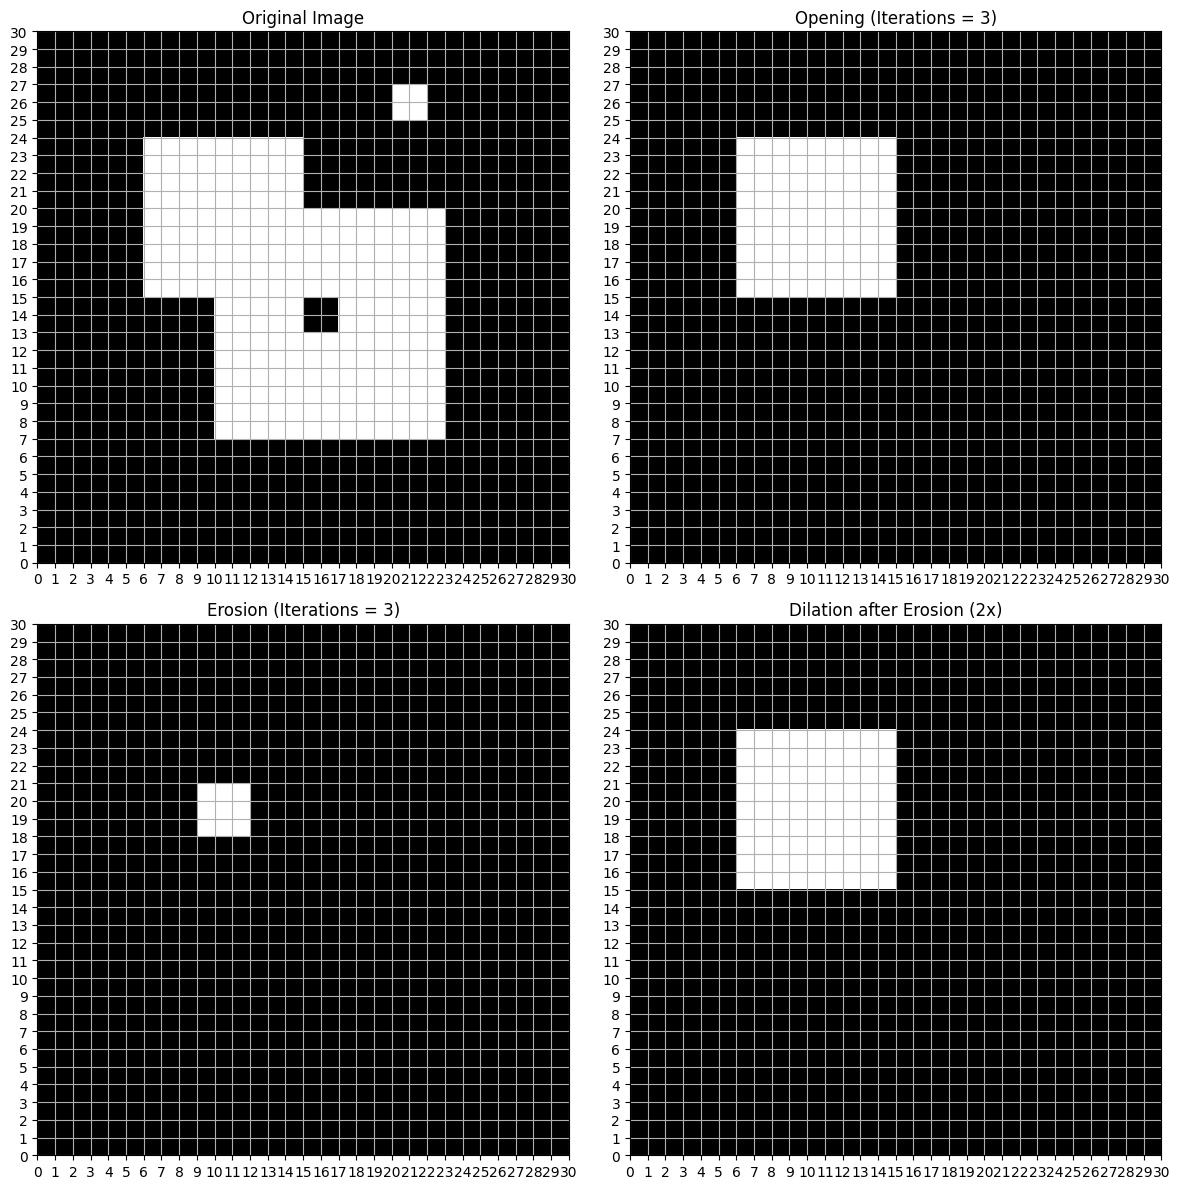

In [9]:
# `Opening` 연산 반복
opened_iter = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=3)

# 직접적인 반복
# 침식 2회
eroded_thrice = cv2.erode(image, kernel, iterations=3)
# 팽창 2회
dilated_thrice = cv2.dilate(eroded_thrice, kernel, iterations=3)

# 결과 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 시각화
visualize(axs[0, 0], image, 'Original Image')
visualize(axs[0, 1], opened_iter, 'Opening (Iterations = 3)')
visualize(axs[1, 0], eroded_thrice, 'Erosion (Iterations = 3)')
visualize(axs[1, 1], dilated_thrice, 'Dilation after Erosion (2x)')

plt.tight_layout()
plt.show()

## 외곽선 검출 & Top-Hat 변환과 Black-Hat 변환

### 모폴로지 기법을 응용한 외곽선 검출(그래디언트)


### Top-Hat

* Top-Hat 변환은 Top-Hat 변환은 원본 이미지에서 열기 연산(Open)된 이미지를 빼는 연산이다.

    `Top-Hat` = `원본 이미지` − `Open 연산된 이미지`

* 결과: 원본 이미지의 어두운 배경 속의 흰색 점을 검출한다.

### Black-Hat 변환

* Black-Hat 변환은 닫기 연산(Close)된 이미지에서 원본 이미지를 빼는 연산이다.

    `Black-Hat` = `Close 연산된 이미지` − `원본 이미지`

* 결과: 원본 이미지의 밝은 배경 속의 검은색 점을 검출한다.

### 활용 예시

1. 이미지 전처리
Top-Hat과 Black-Hat 변환은 이미지의 전처리 단계에서 자주 사용된다. 예를 들어, 문서 이미지에서 배경을 제거하고 글자를 강조하거나, 의료 이미지에서 특정 구조를 강조하는 데 유용하다.

2. 객체 검출
Top-Hat 변환은 작은 객체나 밝은 영역을 검출하는 데 사용된다. 반대로 Black-Hat 변환은 작은 어두운 객체나 구멍을 검출하는 데 사용된다.

3. 특징 추출
이미지에서 특정 패턴이나 특징을 추출하여 이미지 분석, 패턴 인식, 컴퓨터 비전 등의 응용 분야에 사용될 수 있다.


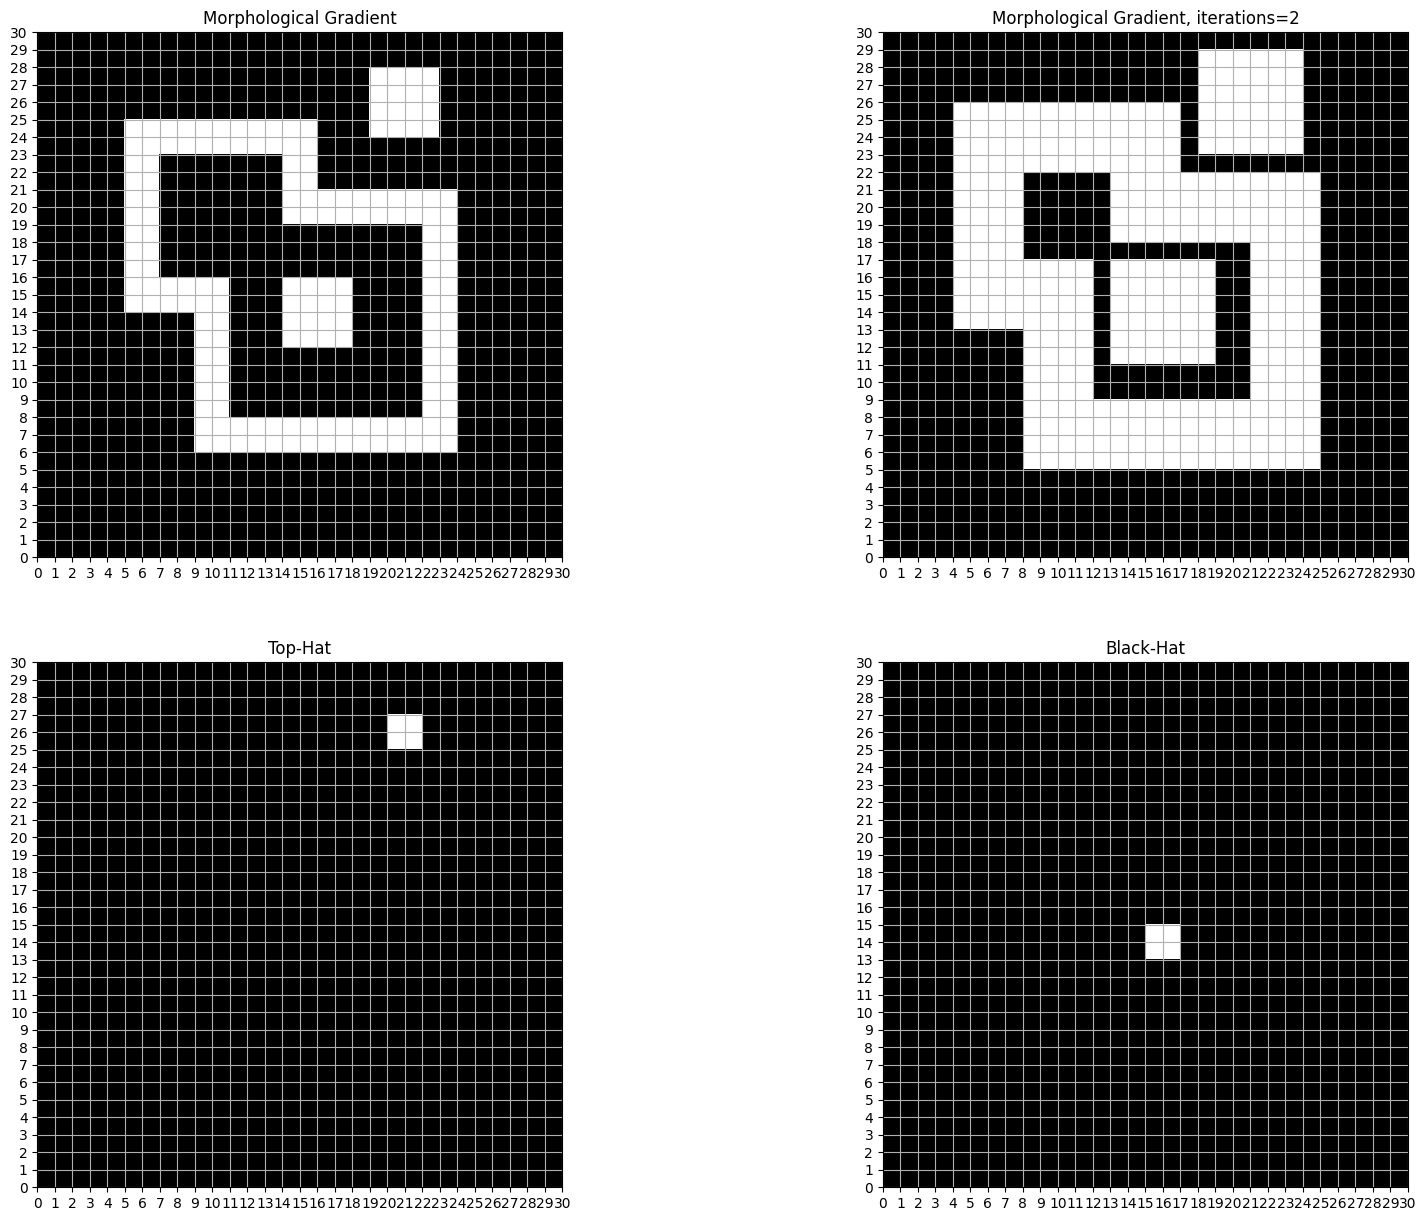

In [10]:
# 결과 시각화
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Morphological Gradient
visualize(axs[0, 0], gradient, 'Morphological Gradient')

# Morphological Gradient
visualize(axs[0, 1], gradient2, 'Morphological Gradient, iterations=2')

# Top-Hat
visualize(axs[1, 0], tophat, 'Top-Hat')

# Black-Hat
visualize(axs[1, 1], blackhat, 'Black-Hat')

#그레이 스케일 모폴로지 연산


## 그레이스케일 영상의 침식과 팽창 연산

그레이스케일 영상과 이진 영상에서의 차이점은 픽셀 값이 0과 255로만 구성된 것이 아니라 0에서 255 사이의 연속적인 값으로 이루어져 있다는 점이다.

따라서 다음과 같은 연산을 통해 침식과 팽창 연산을 수행한다.

  ### 그레이스케일 침식 연산

  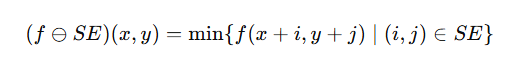

  ### 그레이스케일 팽창 연산

  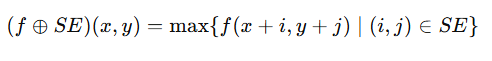

* `두 방식은 미디언 필터의 동작과 비슷하다.`

* 미디언 필터가 주변 픽셀들의 그레이스케일 값 중에서 중간값을 취하는 것이고, 최댓값 필터는 주변 픽셀의 그레이스케일 값 중 최솟값을 취하는 것이다.

## Top-Hat, Black-Hat의 응용.

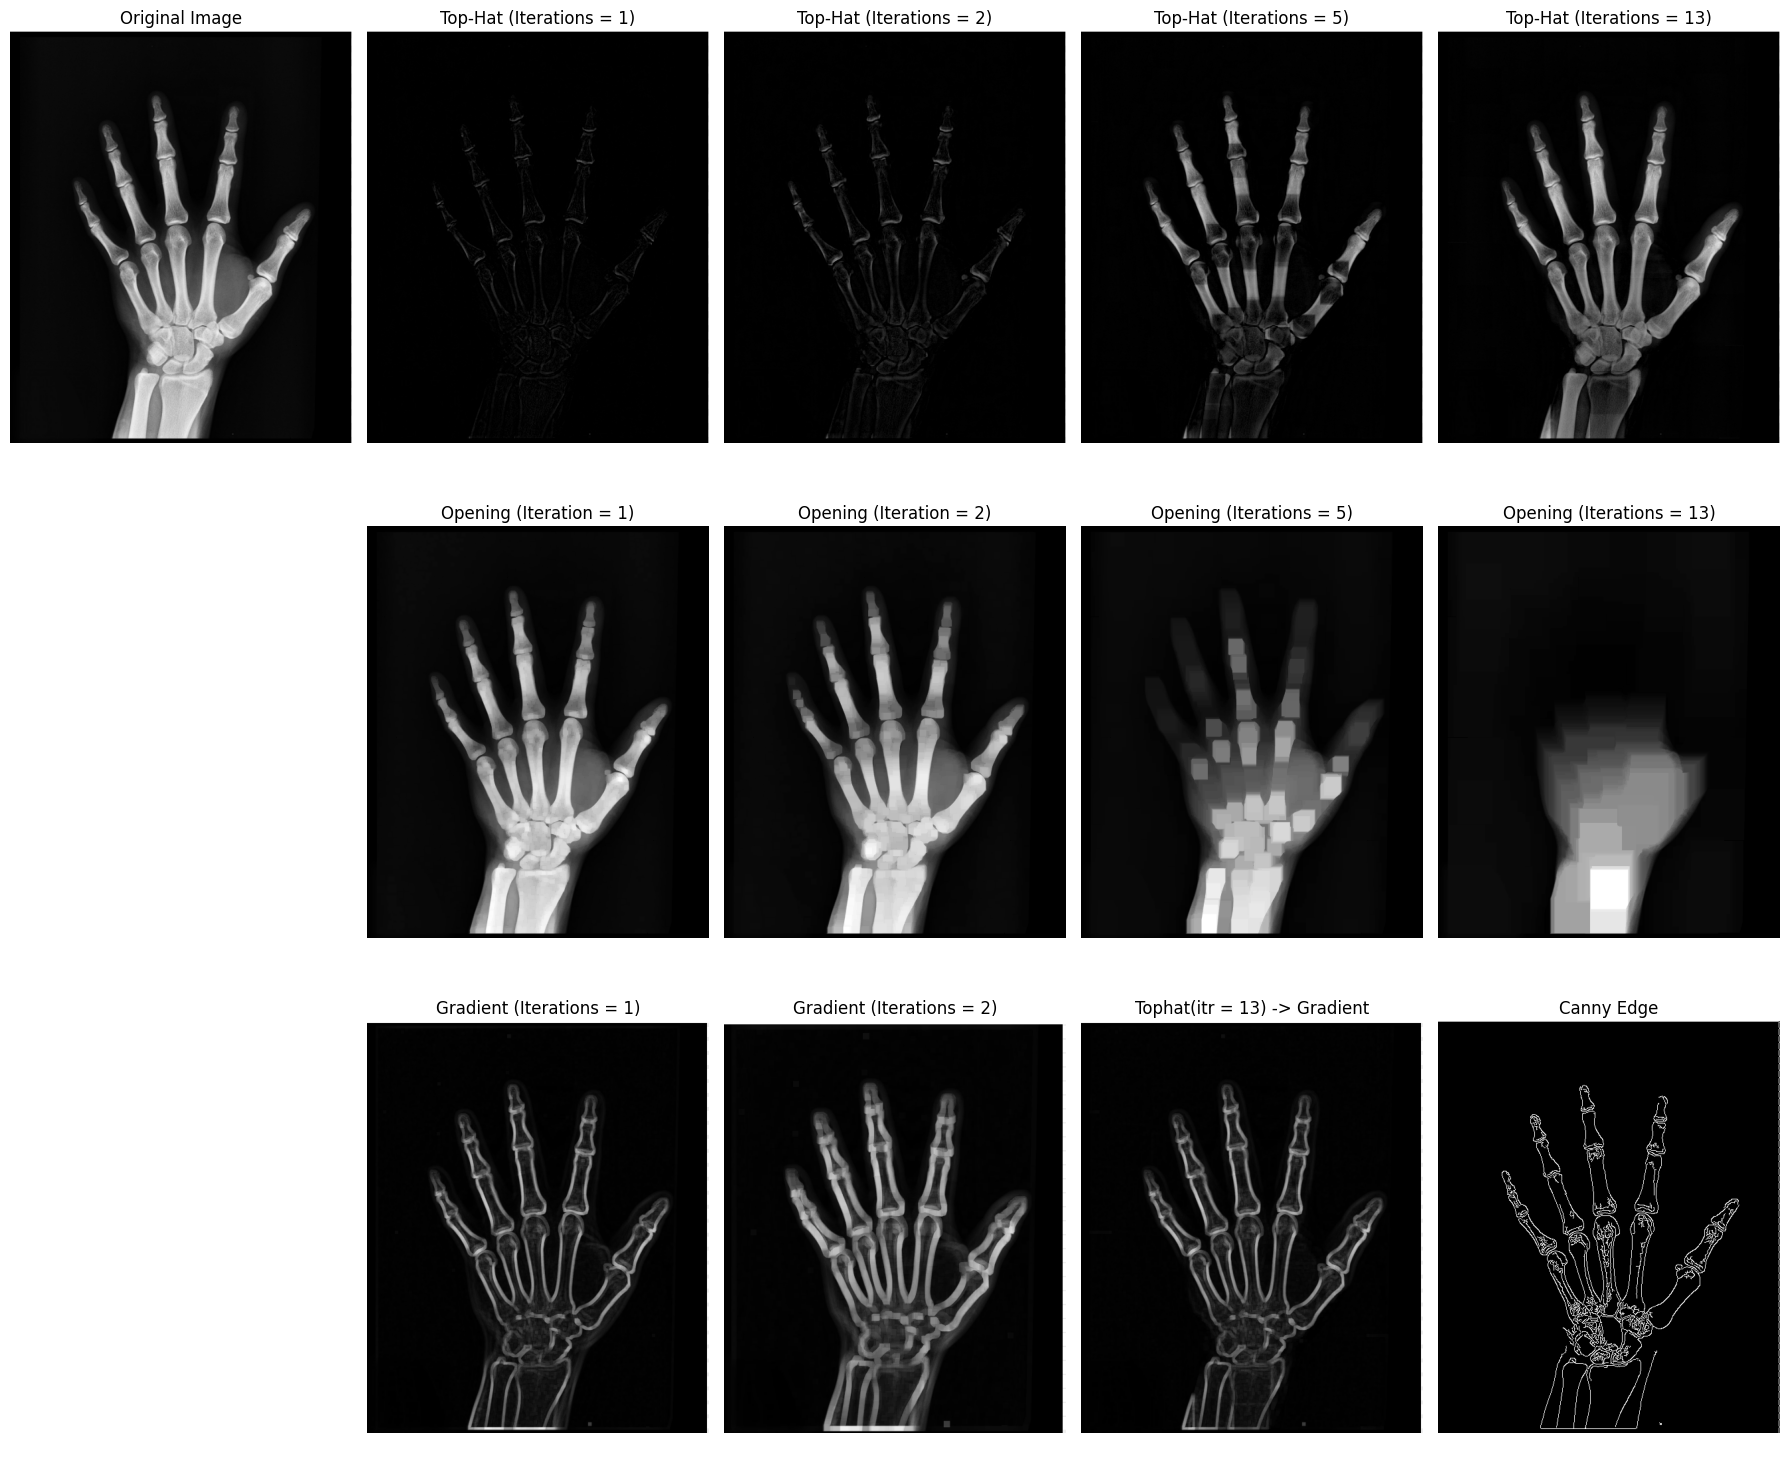

In [ ]:
# 이미지 불러오기
image = cv2.imread('/content/drive/My Drive/x-ray.PNG', cv2.IMREAD_GRAYSCALE)

# 커널 생성
kernel = np.ones((5, 5), np.uint8)


# `cv2.morphologyEx`의 iterations를 사용한 Top-Hat 변환
tophat_iterations_once = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=1)
tophat_iterations_twice = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=2)
tophat_iterations_five_time = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=5)
tophat_iterations_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=13)

# 첫 번째 열기 연산
opened_once = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
# 두 번째 열기 연산
opened_twice = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
# 다섯 번째 열기 연산
opened_five_time = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=5)
# 열기 연산 반복 13회
opened_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=13)

# 'cv2.morphologyEx'의 iterations를 사용한 Black-Hat 연산
blackhat_iterations_once = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=1)
blackhat_iterations_twice = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=2)
blackhat_iterations_five_time = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=5)
blackhat_iterations_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=20)


# 형태학적 기울기 (Gradient) 계산
gradient_once = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=1)
gradient_twice = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel, iterations=2)
gradient_tophat = cv2.morphologyEx(tophat_iterations_thirteen_time, cv2.MORPH_GRADIENT, kernel, iterations=1)
Canny_edge = cv2.Canny(image, 0, 200)

# 이미지 시각화 함수
def visualize2(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')


# 결과 시각화
fig, axs = plt.subplots(3, 5, figsize=(18, 15))

# 시각화
visualize2(axs[0, 0], image, 'Original Image')
visualize2(axs[0, 1], tophat_iterations_once, 'Top-Hat (Iterations = 1)')
visualize2(axs[0, 2], tophat_iterations_twice, 'Top-Hat (Iterations = 2)')
visualize2(axs[0, 3], tophat_iterations_five_time, 'Top-Hat (Iterations = 5)')
visualize2(axs[0, 4], tophat_iterations_thirteen_time, 'Top-Hat (Iterations = 13)')

visualize2(axs[1, 1], opened_once, 'Opening (Iteration = 1)')
visualize2(axs[1, 2], opened_twice, 'Opening (Iteration = 2)')
visualize2(axs[1, 3], opened_five_time, 'Opening (Iterations = 5)')
visualize2(axs[1, 4], opened_thirteen_time, 'Opening (Iterations = 13)')

visualize2(axs[2, 1], gradient_once, 'Gradient (Iterations = 1)')
visualize2(axs[2, 2], gradient_twice, 'Gradient (Iterations = 2)')
visualize2(axs[2, 3], gradient_tophat, 'Tophat(itr = 13) -> Gradient')
visualize2(axs[2, 4], Canny_edge, 'Canny Edge')

axs[0, 0].axis('off')
axs[1, 0].axis('off')
axs[2, 0].axis('off')

plt.tight_layout()
plt.show()


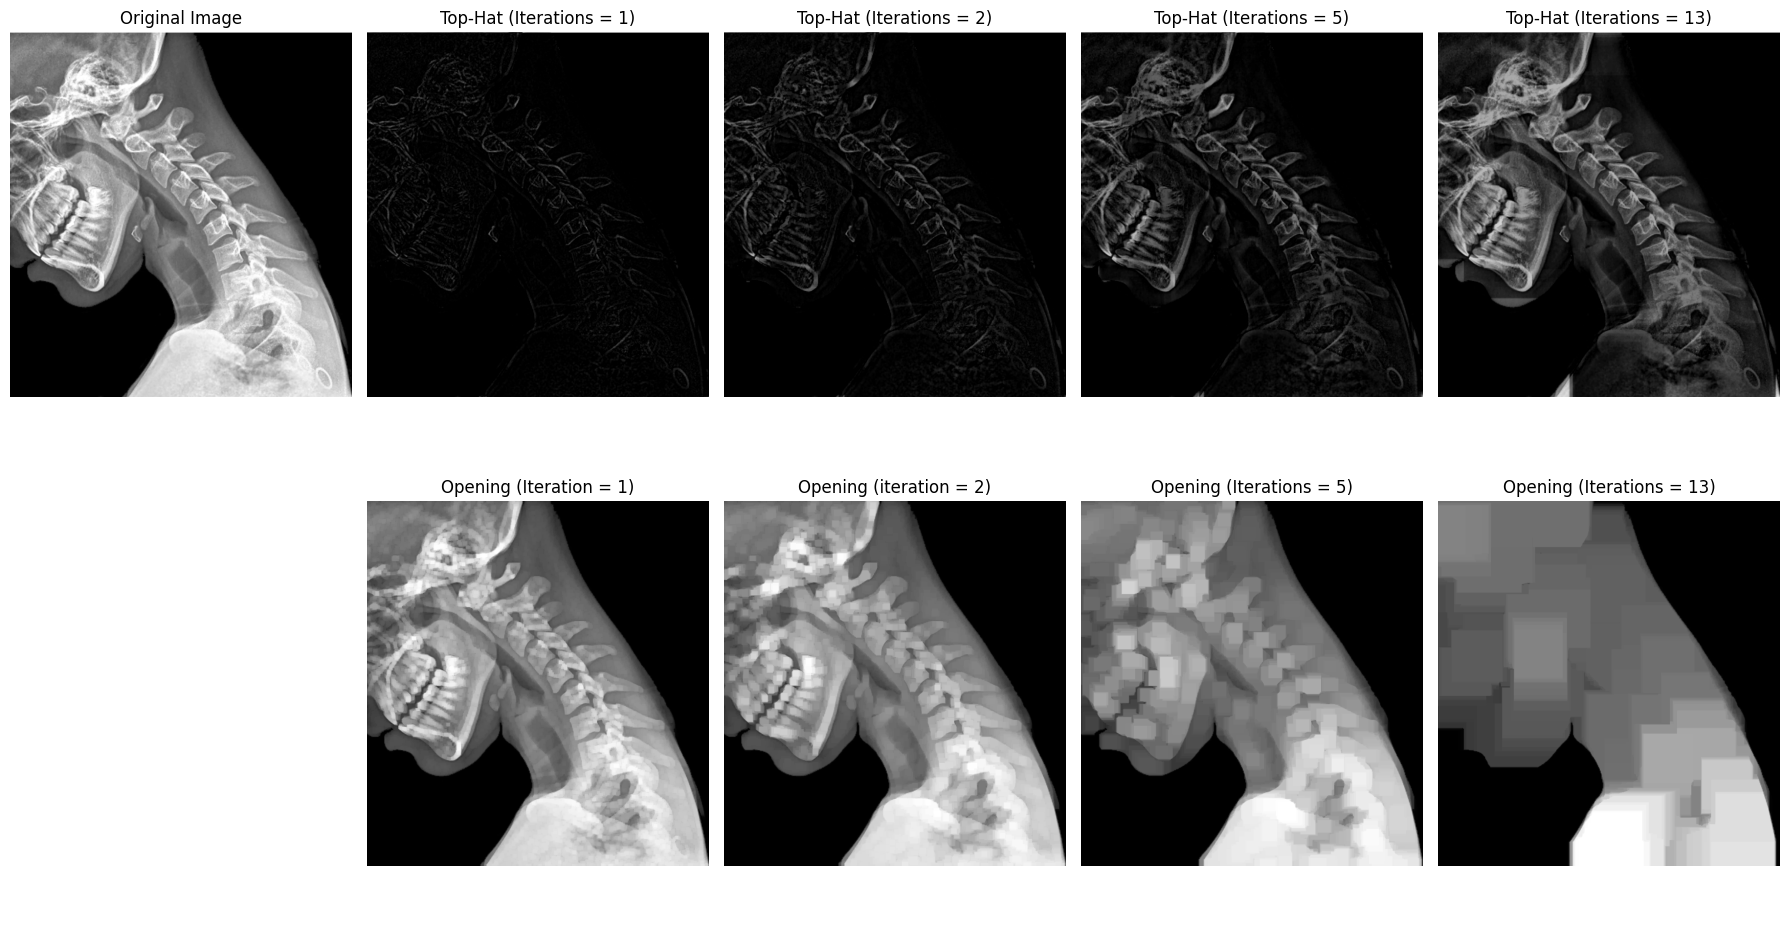

In [ ]:
# 이미지 불러오기
image = cv2.imread('/content/drive/My Drive/X-ray2.PNG', cv2.IMREAD_GRAYSCALE)


# `cv2.morphologyEx`의 iterations를 사용한 Top-Hat 변환
tophat_iterations_once = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=1)
tophat_iterations_twice = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=2)
tophat_iterations_five_time = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=5)
tophat_iterations_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=20)

# 직접적인 반복적 Top-Hat 변환
# 첫 번째 열기 연산
opened_once = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
# 두 번째 열기 연산
opened_twice = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
# 다섯 번째 열기 연산
opened_five_time = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=5)
# 다섯 번째 열기 연산
opened_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=20)

# 첫 번째 Top-Hat 변환
tophat_once = cv2.subtract(image, opened_once)
# 두 번째 Top-Hat 변환
tophat_twice = cv2.subtract(image, opened_twice)
# 다섯 번째 Top-Hat 변환
tophat_five_time = cv2.subtract(image, opened_five_time)
# 다섯 번째 Top-Hat 변환
tophat_thirteen_time = cv2.subtract(image, opened_thirteen_time)


# 결과 시각화
fig, axs = plt.subplots(2, 5, figsize=(18, 10))

# 시각화
visualize2(axs[0, 0], image, 'Original Image')
visualize2(axs[0, 1], tophat_iterations_once, 'Top-Hat (Iterations = 1)')
visualize2(axs[0, 2], tophat_iterations_twice, 'Top-Hat (Iterations = 2)')
visualize2(axs[0, 3], tophat_iterations_five_time, 'Top-Hat (Iterations = 5)')
visualize2(axs[0, 4], tophat_iterations_thirteen_time, 'Top-Hat (Iterations = 13)')

visualize2(axs[1, 1], opened_once, 'Opening (Iteration = 1)')
visualize2(axs[1, 2], opened_twice, 'Opening (iteration = 2)')
visualize2(axs[1, 3], opened_five_time, 'Opening (Iterations = 5)')
visualize2(axs[1, 4], opened_thirteen_time, 'Opening (Iterations = 13)')

axs[1, 0].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# 이미지 불러오기
image = cv2.imread('/content/drive/My Drive/blood vessels.jpg', cv2.IMREAD_GRAYSCALE)

not_image = cv2.bitwise_not(image)

# 커널 생성
kernel = np.ones((3, 3), np.uint8)

# 'cv2.morphologyEx'의 iterations를 사용한 Black-Hat 연산
blackhat_iterations_once = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=1)
blackhat_iterations_twice = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=2)
blackhat_iterations_five_time = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=5)
blackhat_iterations_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel, iterations=13)

# 첫 번째 열기 연산
closed_once = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)
# 두 번째 열기 연산
closed_twice = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=2)
# 다섯 번째 열기 연산
closed_five_time = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=5)
# 열기 연산 반복 13회
closed_thirteen_time = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=13)

# 결과 시각화
fig, axs = plt.subplots(2, 5, figsize=(18, 15))

# 시각화
visualize2(axs[0, 0], image, 'Original Image')
visualize2(axs[0, 1], blackhat_iterations_once, 'Black-Hat (iterations = 1)')
visualize2(axs[0, 2], blackhat_iterations_twice, 'Black-Hat (iterations = 2)')
visualize2(axs[0, 3], blackhat_iterations_five_time, 'Black-Hat (iterations = 5)')
visualize2(axs[0, 4], blackhat_iterations_thirteen_time, 'Black-Hat (iterations = 13)')

visualize2(axs[1, 0], not_image, 'Not Image')
visualize2(axs[1, 1], closed_once, 'Closing (Iteration = 1)')
visualize2(axs[1, 2], closed_twice, 'Closing (Iteration = 2)')
visualize2(axs[1, 3], closed_five_time, 'Closing (Iterations = 5)')
visualize2(axs[1, 4], closed_thirteen_time, 'Closing (Iterations = 13)')


plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 모폴로지 연산의 골격화

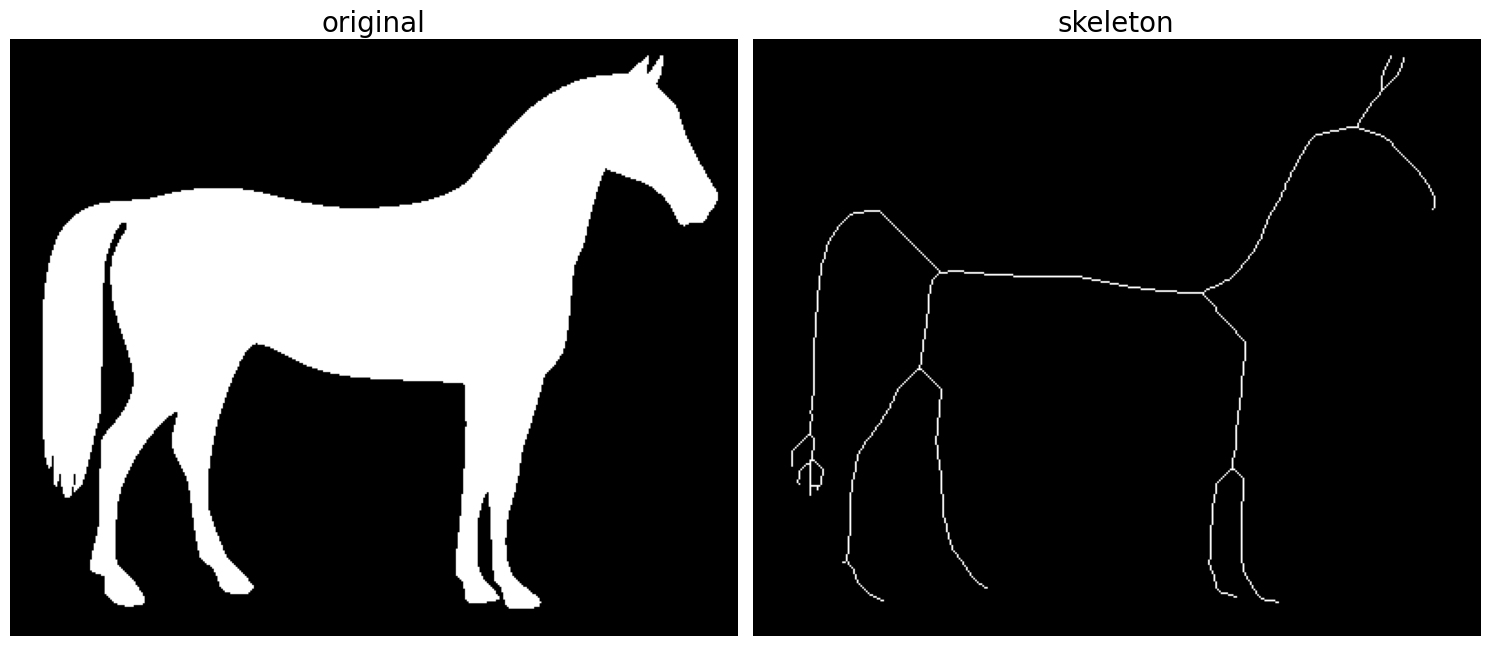

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)

axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('original', fontsize=20)

axes[1].imshow(skeleton, cmap='gray')
axes[1].axis('off')
axes[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

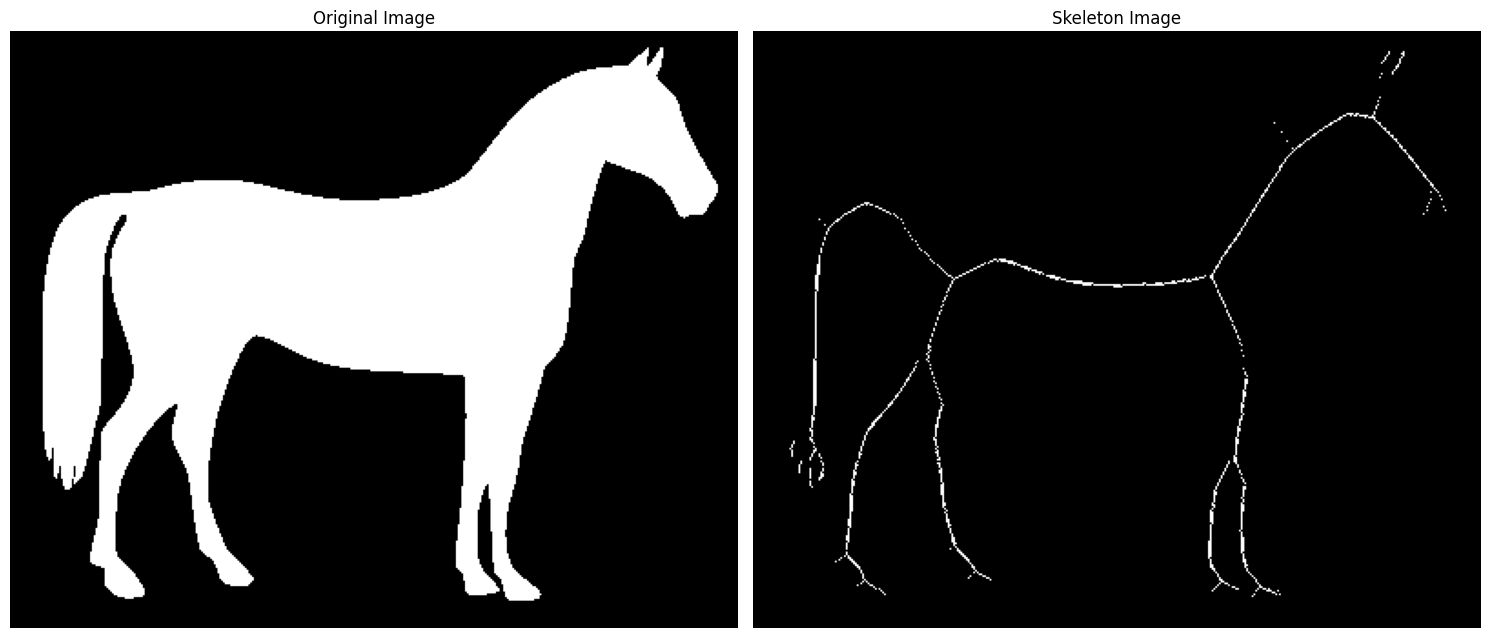

In [ ]:
# Convert the image to a binary format (0 and 255)
image = image.astype(np.uint8) * 255

# Create a copy of the image for processing
A = image.copy()
skel_dst = np.zeros(image.shape, np.uint8)

# Define the structuring element
B = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = True

while done:
    # Erode the image using the structuring element
    erode = cv2.erode(A, B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp = cv2.subtract(erode, opening)
    skel_dst = cv2.bitwise_or(skel_dst, tmp)
    A = erode.copy()
    done = cv2.countNonZero(A) > 0

# Define a function to visualize images
def visualize(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Create subplots to visualize the results
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Visualize the original and skeletonized images
visualize(axs[0], image, 'Original Image')
visualize(axs[1], skel_dst, 'Skeleton Image')

plt.tight_layout()
plt.show()

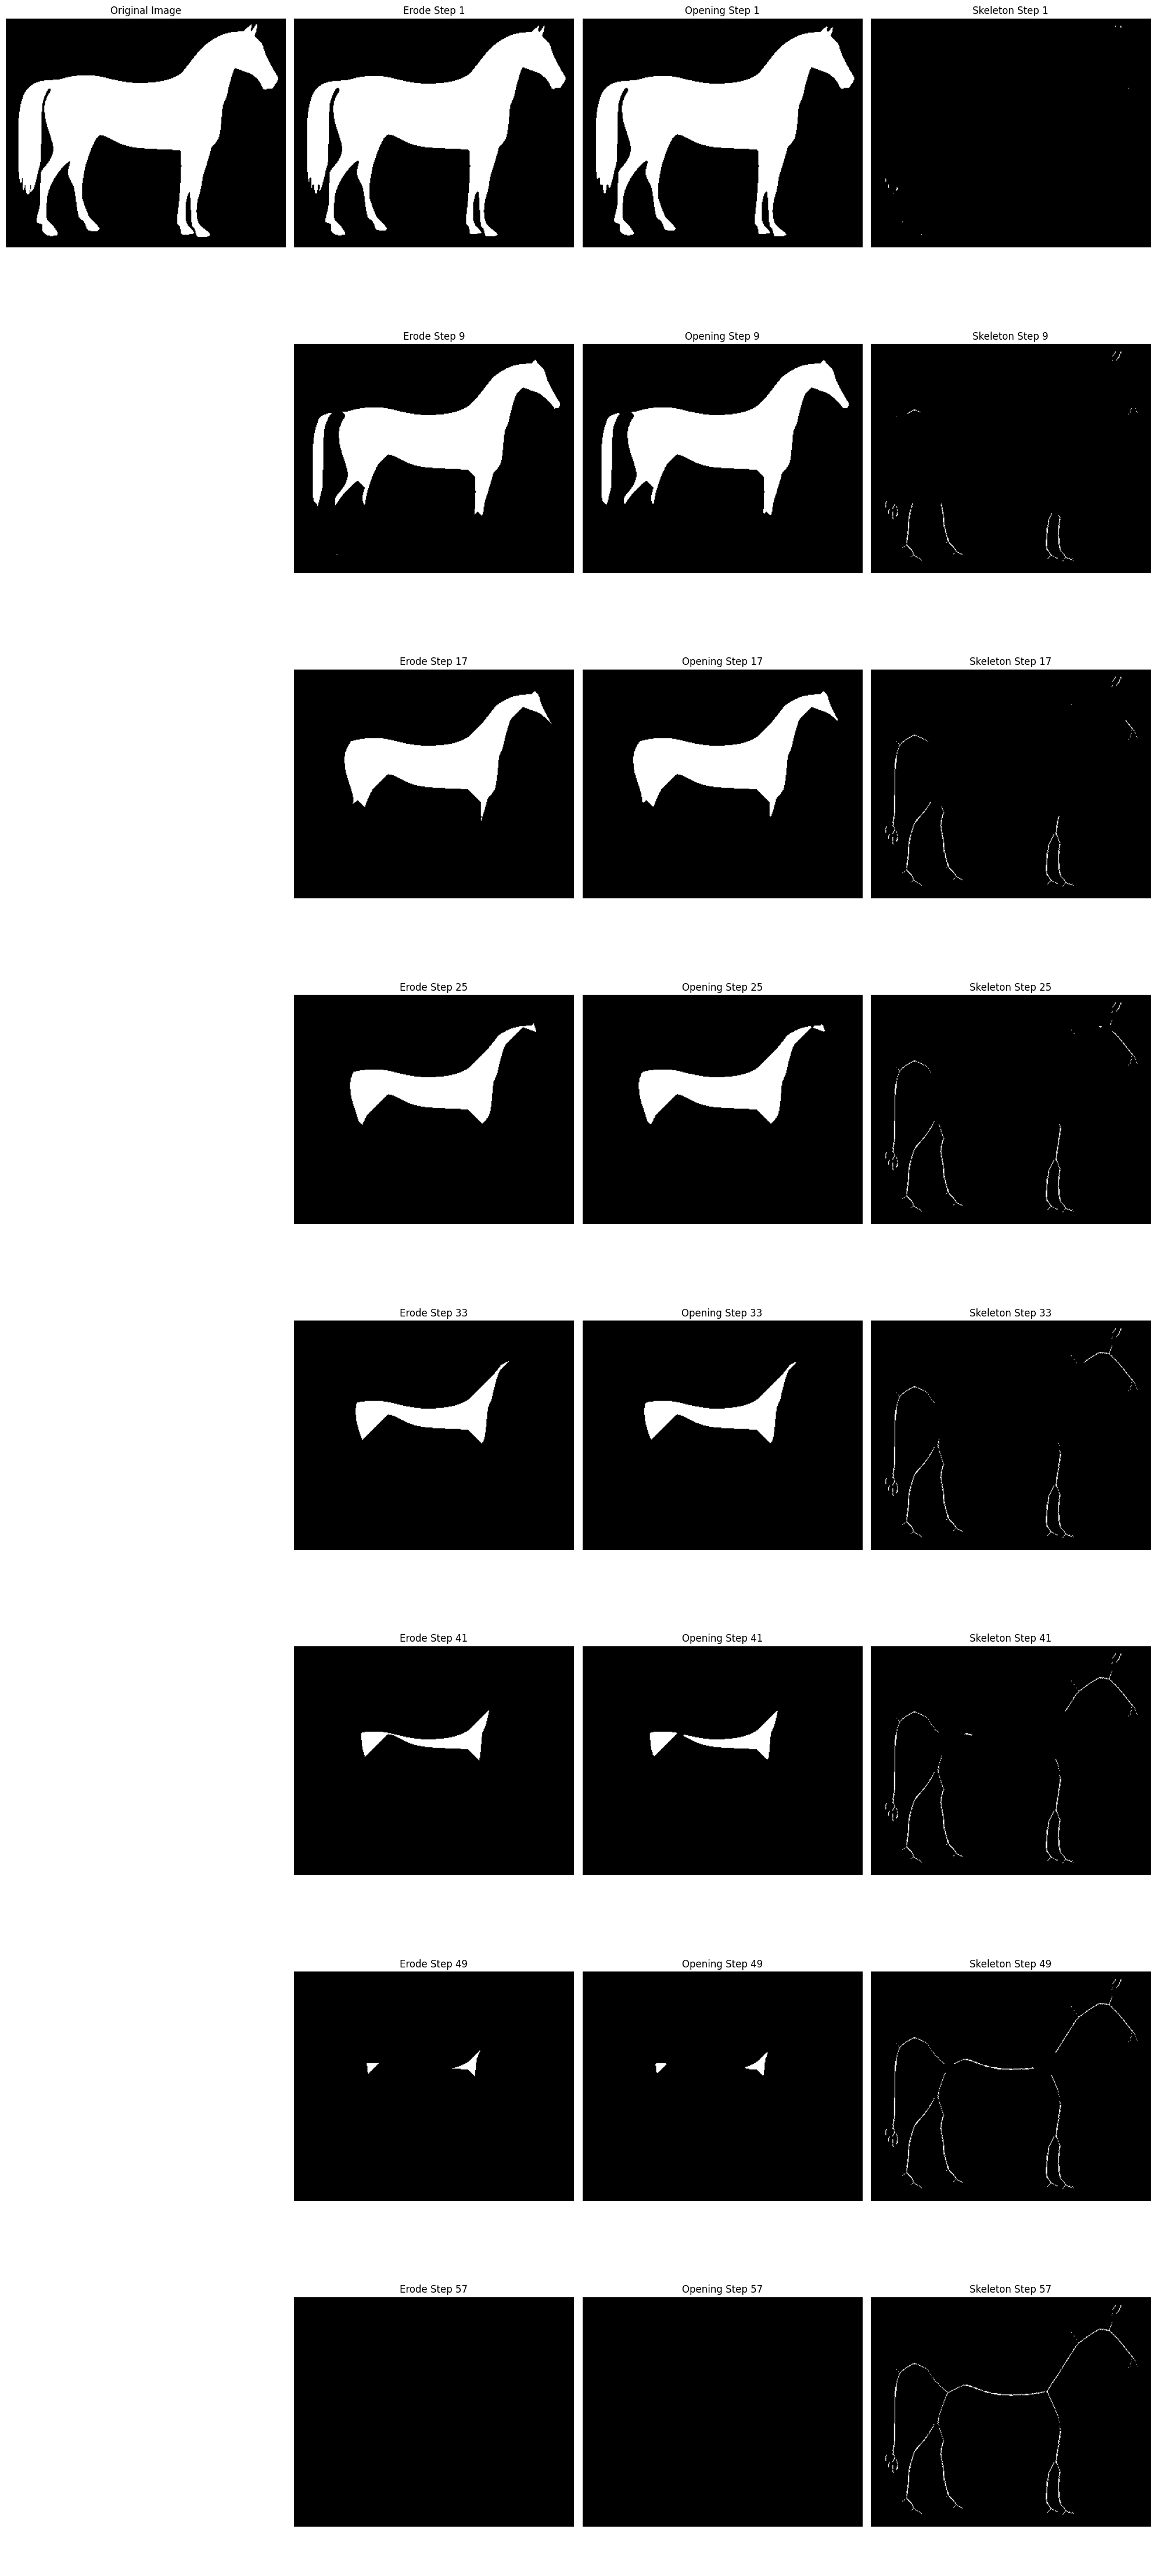

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import invert

# Load and invert the horse image
image = invert(data.horse())

# Convert the image to a binary format (0 and 255)
image = image.astype(np.uint8) * 255

# Create a copy of the image for processing
A = image.copy()
skel_dst = np.zeros(image.shape, np.uint8)

# Define the structuring element
B = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Prepare to store intermediate results
intermediate_erode = []
intermediate_opening = []
intermediate_skel_dst = []

done = True
iteration = 0
while done:
    # Erode the image using the structuring element
    erode = cv2.erode(A, B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp = cv2.subtract(erode, opening)
    skel_dst = cv2.bitwise_or(skel_dst, tmp)

    # Store intermediate results every 8 iterations
    if iteration % 8 == 0:
        intermediate_erode.append(erode.copy())
        intermediate_opening.append(opening.copy())
        intermediate_skel_dst.append(skel_dst.copy())

    A = erode.copy()
    done = cv2.countNonZero(A) > 0
    iteration += 1

# Define a function to visualize images
def visualize(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Create subplots to visualize the results
num_steps = len(intermediate_erode)
fig, axs = plt.subplots(num_steps, 4, figsize=(20, 5 * (num_steps + 1)))

# Visualize the original image in the first row, first column
visualize(axs[0, 0], image, 'Original Image')

# Leave the remaining cells in the first row empty
for j in range(1, num_steps):
    axs[j, 0].axis('off')

# Visualize each intermediate result
for i in range(num_steps):
    visualize(axs[i , 1], intermediate_erode[i], f'Erode Step {i * 8 + 1}')
    visualize(axs[i , 2], intermediate_opening[i], f'Opening Step {i * 8 + 1}')
    visualize(axs[i , 3], intermediate_skel_dst[i], f'Skeleton Step {i * 8 + 1}')

plt.tight_layout()
plt.show()
